In [77]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

# warnings.filterwarnings(ignore=pandas.SettingWithCopyWarning)

walmart = pd.read_csv('walmart-sales-dataset-of-45stores.csv')
walmart['Date'] = pd.to_datetime(walmart['Date'],format="mixed")
monthly_sales = walmart.groupby(['Store',walmart['Date'].dt.year,walmart['Date'].dt.month]).agg({'Weekly_Sales':'sum'}).reset_index(allow_duplicates=True)
monthly_sales.columns = ['store','year','month','monthly_sales']
first_of_month = pd.to_datetime(monthly_sales['year'].astype(str) + "-" + monthly_sales['month'].astype(str) + "-01")
monthly_sales['date'] = first_of_month
monthly_sales.drop(columns=['year','month'],inplace=True)

# store 1
store1 = monthly_sales[monthly_sales['store'] == 1]

# all stores
monthly_sales.set_index(['store', 'date'], inplace=True)
monthly_sales.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1620 entries, (1, Timestamp('2010-01-01 00:00:00')) to (45, Timestamp('2012-12-01 00:00:00'))
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   monthly_sales  1620 non-null   float64
dtypes: float64(1)
memory usage: 18.7 KB


In [72]:
# time series decomposition

# statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)

# period
# 'seasonal period"
# predictable fluctations in the time series
# for sales data, seasonality happens yearly, and monthly. 
# people shop more at the beginning of the month, or in the middle of the month
# people shop more at the end of year, etc.

from statsmodels.tsa.seasonal import seasonal_decompose


store1_decomposed = seasonal_decompose(store1['monthly_sales'],period=12)

/var/folders/g7/wg003dgd7td2scfxtm9wznth0000gn/T/ipykernel_51280/22791579.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


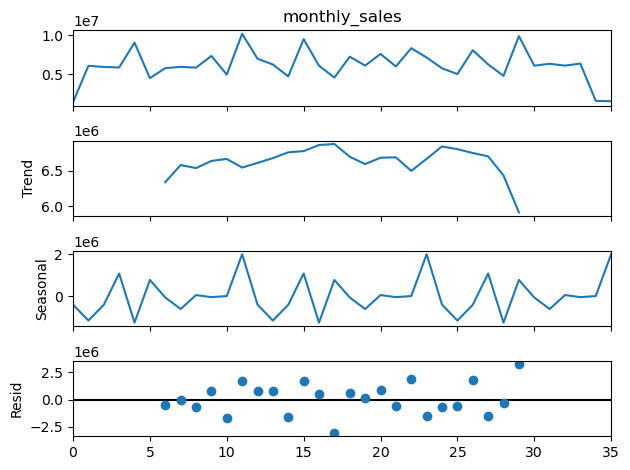

In [74]:
# visualizing the decomposition

store1_decomposed.plot()
plt.tight_layout()

# understanding how the decomposition maps back to the time series value

# how to use the decomposition in further steps

In [78]:
# understanding how the decomposition maps back to the time series value

store1['trend'] = store1_decomposed.trend
store1['seasonal'] = store1_decomposed.seasonal
store1['resid'] = store1_decomposed.resid

/var/folders/g7/wg003dgd7td2scfxtm9wznth0000gn/T/ipykernel_51280/2520109287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1['trend'] = store1_decomposed.trend
/var/folders/g7/wg003dgd7td2scfxtm9wznth0000gn/T/ipykernel_51280/2520109287.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1['seasonal'] = store1_decomposed.seasonal
/var/folders/g7/wg003dgd7td2scfxtm9wznth0000gn/T/ipykernel_51280/2520109287.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [79]:
store1

,store,monthly_sales,date,trend,seasonal,resid
0,1,1453329.50,2010-01-01,NaN,-4.006340e+05,NaN
1,1,6109082.18,2010-02-01,NaN,-1.160937e+06,NaN
2,1,5965143.02,2010-03-01,NaN,-4.080903e+05,NaN
3,1,5897939.82,2010-04-01,NaN,1.085593e+06,NaN
4,1,9076140.38,2010-05-01,NaN,-1.258923e+06,NaN
5,1,4531487.44,2010-06-01,NaN,7.782730e+05,NaN
6,1,5809945.84,2010-07-01,6.338469e+06,-5.816554e+04,-4.703576e+05
7,1,5978701.10,2010-08-01,6.577405e+06,-6.098976e+05,1.119358e+04
8,1,5873662.41,2010-09-01,6.533935e+06,5.731818e+04,-7.175913e+05
9,1,7379147.27,2010-10-01,6.634345e+06,-4.218149e+04,7.869833e+05


In [82]:
store1.loc[29,'monthly_sales'] == (store1.loc[29,'trend'] + store1.loc[29,'seasonal'] + store1.loc[29,'resid'])

True

In [85]:
# how did we get these numbers
# we start with specifying the length of the seasonal period (12 months)
# we calculate the trend using a moving average
# so if our period = 12, the trend value for any given month t is the average of the previous 5 months and subsequent 6 months

# so for july 2010 how do we calculate the trend value.

store1.iloc[6]

store                              1
monthly_sales             5809945.84
date             2010-07-01 00:00:00
trend                  6338469.00125
seasonal               -58165.543437
resid                 -470357.617813
Name: 6, dtype: object

In [91]:
#  6338469.00125

# we take the average of monthly_sales between jan

(store1.loc[0:5,'monthly_sales'].sum() + store1.loc[6,'monthly_sales'] + store1.loc[7:12,'monthly_sales'].sum())/12

6207317.3075